In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
df = pd.read_csv('/content/ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [22]:
df = df.drop(columns=['Cylinders'])  # Cylinders has no variance

In [23]:
# Encoding categorical variable 'Fuel_Type' using One-Hot Encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)
fuel_encoded = encoder.fit_transform(df[['Fuel_Type']])
fuel_encoded_df = pd.DataFrame(fuel_encoded, columns=encoder.get_feature_names_out(['Fuel_Type']))

In [24]:
# Combining the encoded categorical data with the original dataframe
df = pd.concat([df.drop(columns=['Fuel_Type']), fuel_encoded_df], axis=1)

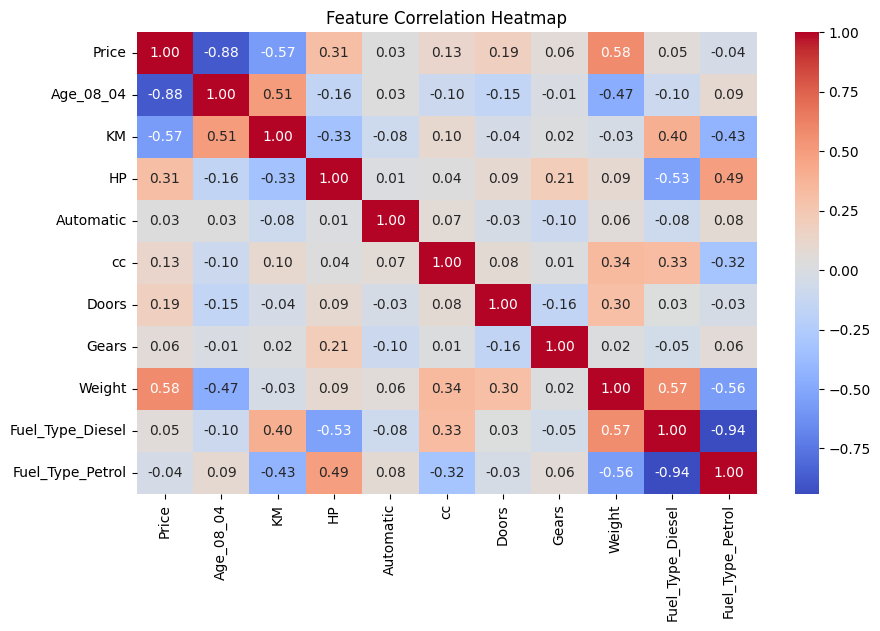

In [25]:
# Exploratory Data Analysis (EDA)
# Visualizing correlations between numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

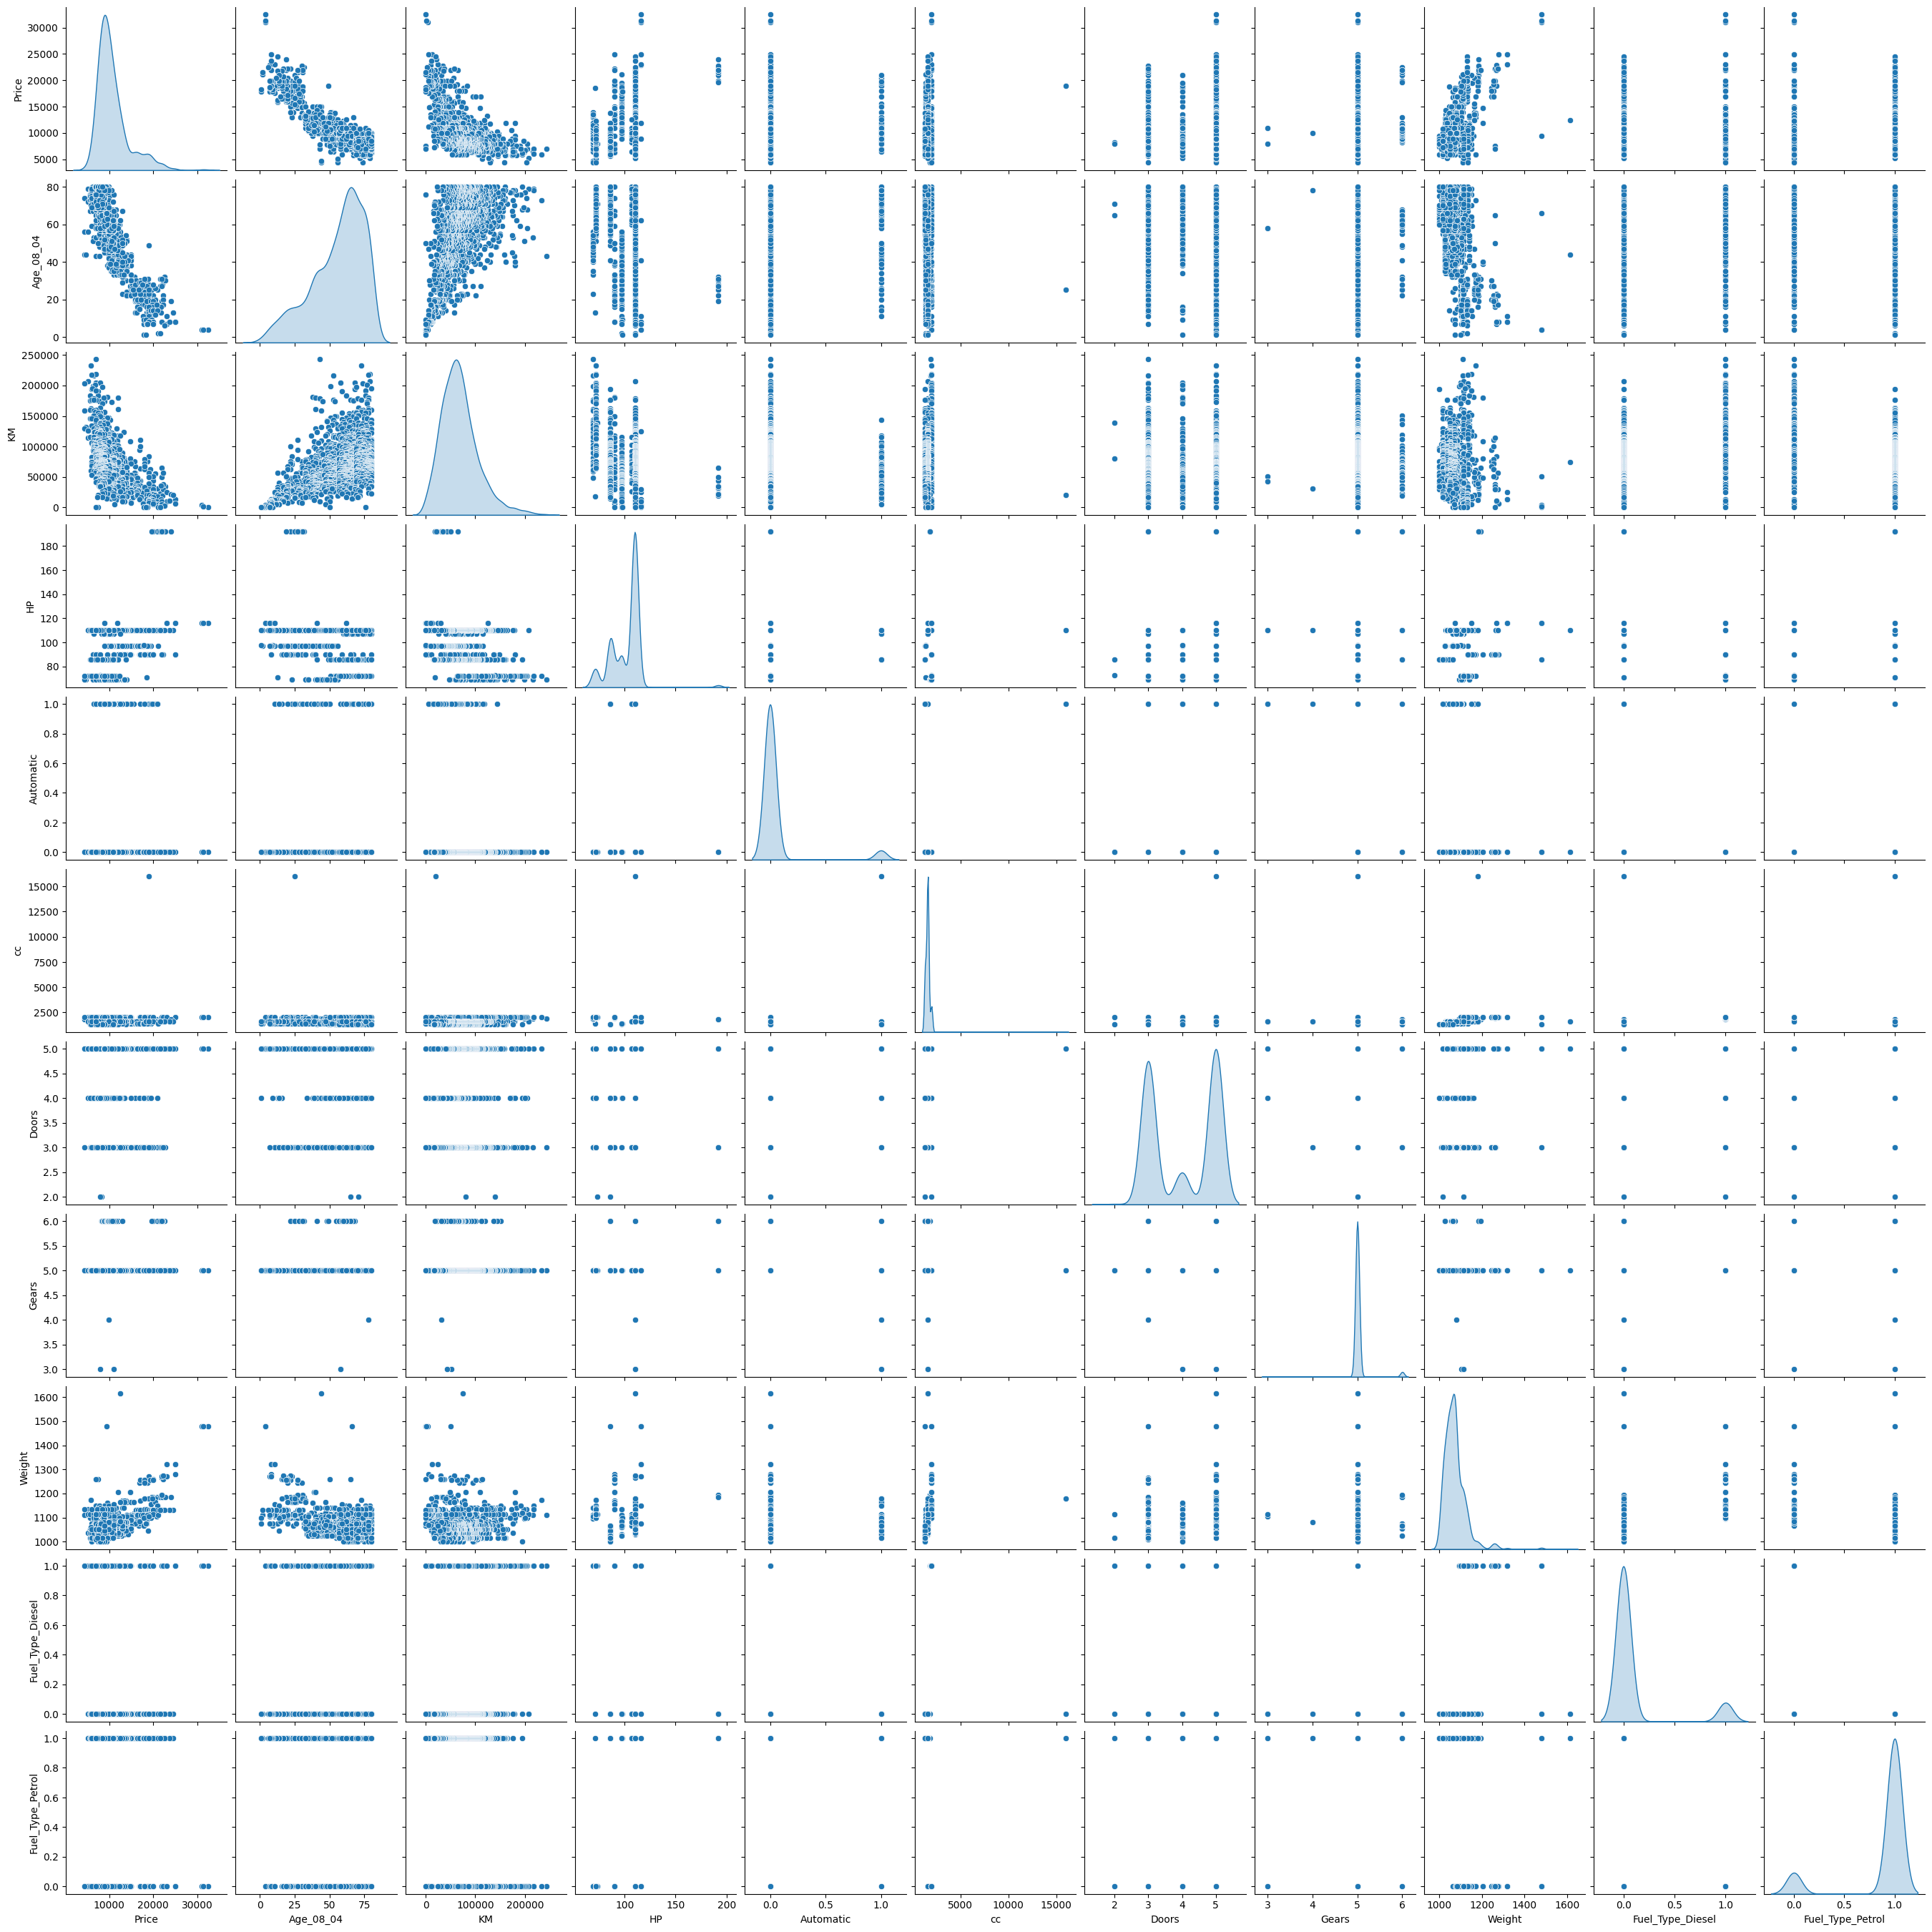

In [26]:
# Pairplot visualization to understand feature relationships
sns.pairplot(df, diag_kind='kde')
plt.show()

In [27]:
# Handling outliers using IQR method in 'KM' and 'cc' columns
Q1 = df[['KM', 'cc']].quantile(0.25)
Q3 = df[['KM', 'cc']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['KM'] >= lower_bound['KM']) & (df['KM'] <= upper_bound['KM']) &
        (df['cc'] >= lower_bound['cc']) & (df['cc'] <= upper_bound['cc'])]

In [28]:
# Splitting data into features (X) and target (y)
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target variable


In [29]:
# Splitting into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Handling missing values (imputing with mean for numerical, mode for categorical)
for col in X_train.columns:
    if X_train[col].isnull().sum() > 0:
        if X_train[col].dtype == 'float64' or X_train[col].dtype == 'int64':
            X_train[col].fillna(X_train[col].mean(), inplace=True)
            X_test[col].fillna(X_train[col].mean(), inplace=True)
        else:
            X_train[col].fillna(X_train[col].mode()[0], inplace=True)
            X_test[col].fillna(X_train[col].mode()[0], inplace=True)

In [31]:
# Filling missing values in target variable
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_train.mean(), inplace=True)

In [32]:
# Standardizing numerical features for better model performance
scaler = StandardScaler()
numerical_features = ['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Weight']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [38]:
from sklearn.metrics import mean_squared_error
import inspect
print(inspect.signature(mean_squared_error))


(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')


In [39]:
# Multiple Linear Regression Model
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)
rmse_mlr = np.sqrt(mean_squared_error(y_test, y_pred_mlr))
r2_mlr = r2_score(y_test, y_pred_mlr)

In [40]:
# Lasso Regression Model (L1 Regularization for feature selection)
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

In [41]:
# Ridge Regression Model (L2 Regularization to reduce overfitting)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)


In [42]:
# Printing Model Performance Metrics
print("Model Performance:")
print(f"MLR - RMSE: {rmse_mlr:.2f}, R²: {r2_mlr:.4f}")
print(f"Lasso - RMSE: {rmse_lasso:.2f}, R²: {r2_lasso:.4f}")
print(f"Ridge - RMSE: {rmse_ridge:.2f}, R²: {r2_ridge:.4f}")

Model Performance:
MLR - RMSE: 1209.28, R²: 0.8308
Lasso - RMSE: 1208.61, R²: 0.8310
Ridge - RMSE: 1207.39, R²: 0.8313


In [43]:
# Feature Importance using Lasso Regression
lasso_coefficients = pd.Series(lasso.coef_, index=X_train.columns)
print("\nFeature Importance (Lasso Coefficients):")
print(lasso_coefficients.sort_values(ascending=False))


Feature Importance (Lasso Coefficients):
Fuel_Type_Diesel    2156.430307
HP                   860.067611
Automatic            550.654974
Weight               523.700993
Fuel_Type_Petrol     444.193737
Gears                100.867239
Doors                 41.787264
KM                  -479.812856
cc                  -517.600442
Age_08_04          -2383.842910
dtype: float64


##Code Comments and Explanations


It includes essential steps such as data loading, encoding categorical variables, handling missing values, feature scaling, model training, and evaluation.
Additionally, it ensures proper exploratory data analysis (EDA) through visualizations like heatmaps and pair plots.

##Assumptions Made and Their Implications

Assumption 1: One-Hot Encoding of Categorical Variables
The 'Fuel_Type' column is encoded using one-hot encoding, dropping the first category to avoid the dummy variable trap.
Implication: This prevents multicollinearity but assumes that the categorical feature has a meaningful relationship with the target variable.

Assumption 2: Outlier Removal Using IQR Method
Outliers in the 'KM' and 'cc' columns are removed using the interquartile range (IQR) method.
Implication: This assumes that extreme values are errors or anomalies, which may not always be true.

## Q.1> What is Normalization & Standardization and how is it helpful?

#Normalization and Standardization are techniques used to rescale numerical data to improve the performance of machine learning algorithms.

 It rescales the values of a feature to a fixed range, usually [0,1] or [-1,1]

 When to use?

 When data does not follow a normal distribution.
 In distance-based algorithms (e.g., k-NN, K-Means, Neural Networks) to prevent features with larger scales from dominating.


  
#Standardization: It transforms data to have zero mean and unit variance.  
  
  When to use?
  
  When data follows a Gaussian (normal) distribution. Useful for algorithms that assume normally distributed data, such as Linear Regression, Logistic Regression, and SVM.
  
  How is it helpful?
  
  Helps speed up training and improves accuracy. Prevents features with larger values from dominating. Helps in faster convergence of gradient descent.

##Q2.>What techniques can be used to address multicollinearity in multiple linear regression?


Multicollinearity occurs when two or more independent variables are highly correlated, leading to unreliable estimates.

Techniques to handle multicollinearity:
Variance Inflation Factor (VIF)


  1.Compute the VIF for each variable.

If VIF > 10, the variable is highly collinear and should be removed.

 2.Removing one of the correlated variables

Identify highly correlated variables using a correlation matrix and drop one.

 3.Principal Component Analysis (PCA)

PCA transforms correlated variables into a set of uncorrelated components.

 4.Ridge Regression (L2 Regularization)

Adds a penalty term to shrink coefficients and reduce the effect of multicollinearity.

 5.Lasso Regression (L1 Regularization)

Lasso regression helps by forcing some coefficients to zero, effectively removing irrelevant variables.

 6.Feature Engineering (Combining or Transforming Variables)

Create a single feature from multiple correlated variables (e.g., taking their average).